# Download Dataset from kaggle

In [1]:
! pip install -q kaggle
! echo '{"username":"raphaelziegler","key":"6411cf4677214e4b50e909e3087b3c9a"}' > kaggle.json
# ! cat kaggle.json
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d biancaferreira/african-wildlife
! unzip -qq african-wildlife.zip

 98% 440M/448M [00:04<00:00, 110MB/s]
100% 448M/448M [00:04<00:00, 105MB/s]


# Python Imports

In [2]:
import os
import sys
import shutil
import tarfile
import datetime
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from scipy.ndimage import rotate

Import helper functions 

In [3]:
!wget --no-cache "https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/helper.py"
!wget --no-cache "https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/image_manipulation.py"

import helper as h
import image_manipulation as im

--2023-02-25 17:59:51--  https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2038 (2.0K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-02-25 17:59:52 (18.2 MB/s) - ‘helper.py’ saved [2038/2038]

--2023-02-25 17:59:52--  https://raw.githubusercontent.com/raphaelziegler/CAS-in-Applied-Data-Science/main/M6/image_manipulation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

# Variables (what should be executed)
- Read images
- Image size

In [4]:
# different ways to read and preproces the images (0 or 1)
read_images = 1

# what to run (0 or 1)
cnn_1 = 0

# Inception V3
tl_1 = 0  # Base model required shape (299, 299, 3)
tl_2 = 1

# DenseNet121
tl_3 = 0  # Base model required shape (224, 224, 3)  
tl_4 = 0

# set image size
width = 299
height = 299

# Read Images

In [ ]:
if read_images == 0:
    def prepare_training_img(img, crop=True, resize=True, img_size=(width, height)):
        if img.dtype != np.uint8:
            img *= 255.0

        if crop:
            crop = np.min(img.shape[:2])
            r = (img.shape[0] - crop) // 2
            c = (img.shape[1] - crop) // 2
            cropped = img[r: r + crop, c: c + crop]
        else:
            cropped = img

        if resize:
            img_pil = Image.fromarray(cropped)
            img_pil = img_pil.resize(img_size, Image.ANTIALIAS)
            resized = np.array(img_pil.convert('RGB'))
        else:
            resized = cropped.copy()

        if resized.ndim == 2:
            resized = resized[..., np.newaxis]
        if resized.shape[2] == 4:
            resized = resized[..., :3]
        if resized.shape[2] == 1:
            resized = np.concatenate((resized, resized, resized), axis=2)

        resized = resized.astype(np.float32)

        # img_preproc = tf.keras.applications.nasnet.preprocess_input(resized)
        # img_preproc = tf.keras.applications.densenet.preprocess_input(resized)
        img_preproc = tf.keras.applications.inception_v3.preprocess_input(resized)
        # subtract imagenet mean
        return img_preproc

    def training_img_to_display(img):
        return (img+1)/2


    labels = []
    images = []


    for sample in range(1,285):
        if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
            Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([1,0,0,0])

    for sample in range(287,377):
        if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
            Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([1,0,0,0])

    for sample in range(1,321):
        if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
            Namef='elephant/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='elephant/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,1,0,0])

    for sample in range(323,377):
        if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
            Namef='elephant/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='elephant/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,1,0,0])

    for sample in range(1,54):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(56,136):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(138,232):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(234,297):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(299,380):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(1,69):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(71,106):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(108,113):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(115,146):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(148,380):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

In [ ]:
if read_images == 0:
    def prepare_training_img(img, crop=True, resize=True, img_size=(width, height)):
        if img.dtype != np.uint8:
            img *= 255.0

        if crop:
            crop = np.min(img.shape[:2])
            r = (img.shape[0] - crop) // 2
            c = (img.shape[1] - crop) // 2
            cropped = img[r: r + crop, c: c + crop]
        else:
            cropped = img

        if resize:
            img_pil = Image.fromarray(cropped)
            img_pil = img_pil.resize(img_size, Image.ANTIALIAS)
            resized = np.array(img_pil.convert('RGB'))
        else:
            resized = cropped.copy()

        if resized.ndim == 2:
            resized = resized[..., np.newaxis]
        if resized.shape[2] == 4:
            resized = resized[..., :3]
        if resized.shape[2] == 1:
            resized = np.concatenate((resized, resized, resized), axis=2)

        resized = resized.astype(np.float32)

        img_preproc = tf.keras.applications.nasnet.preprocess_input(resized)
        # subtract imagenet mean
        return img_preproc

    def training_img_to_display(img):
        return (img+1)/2


    labels = []
    images = []


    for sample in range(1,285):
        if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
            Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([1,0,0,0])

    for sample in range(287,377):
        if os.path.isfile('buffalo/'+str(sample).zfill(3)+'.jpg'):
            Namef='buffalo/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='buffalo/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([1,0,0,0])

    for sample in range(1,321):
        if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
            Namef='elephant/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='elephant/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,1,0,0])

    for sample in range(323,377):
        if os.path.isfile('elephant/'+str(sample).zfill(3)+'.jpg'):
            Namef='elephant/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='elephant/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,1,0,0])

    for sample in range(1,54):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(56,136):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(138,232):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(234,297):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(299,380):
        if os.path.isfile('zebra/'+str(sample).zfill(3)+'.jpg'):
            Namef='zebra/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='zebra/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,1,0])

    for sample in range(1,69):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(71,106):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(108,113):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(115,146):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

    for sample in range(148,380):
        if os.path.isfile('rhino/'+str(sample).zfill(3)+'.jpg'):
            Namef='rhino/'+str(sample).zfill(3)+'.jpg'
        else:
            Namef='rhino/'+str(sample).zfill(3)+'.JPG'
        img = plt.imread(Namef)
        images.append(prepare_training_img(img))
        labels.append([0,0,0,1])

In [5]:
if read_images == 1:
    # read path of images
    rp, bp, ep, zp = h.get_image_path()


    images = []
    labels = []


    for path in rp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 0, 0, 1])

    for path in bp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([1, 0, 0, 0])
        
    for path in ep:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 1, 0, 0])
        
    for path in zp:
        meta = im.read_metadata_file(path)
        c_img = im.image_stuff(path, meta, width, height)
        for i in c_img:
            images.append(np.array(i, dtype=np.uint8))
            labels.append([0, 0, 1, 0])

    # images = images.append(np.array(tf.keras.applications.nasnet.preprocess_input(images)))

In [6]:
labels = np.array(labels)
images = np.array(images)

In [7]:
np.random.seed(42)
idx = np.random.permutation(len(labels))
labels = np.array(labels)[idx]
images = np.array(images)[idx]

In [8]:
#We will take 80% from each for training and 20% for validation
n_half = images.shape[0]
n_train_half = n_half*80//100

x_train = images[:n_train_half]
y_train = labels[:n_train_half]

x_valid = images[n_train_half:]
y_valid = labels[n_train_half:]

# CNN 

In [ ]:
if cnn_1 == 1:
    x = tf.keras.layers.Input(shape=(width, height, 3))

    l1 = tf.keras.layers.Conv2D(8, 3, name = 'C1', kernel_initializer='he_uniform', activation='relu')(x)
    l2 = tf.keras.layers.Conv2D(32, 3, strides=2, name = 'C2', kernel_initializer='he_uniform', activation='relu')(l1)
    l3 = tf.keras.layers.Conv2D(16, 3, strides=2, name = 'C3', kernel_initializer='he_uniform', activation='relu')(l2)

    l3_f = tf.keras.layers.Flatten()(l3)

    l4 = tf.keras.layers.Dense(units=16, name='l4', activation='relu')(l3_f)
    l4a = tf.keras.layers.Dense(units=64, name='l4a', activation='relu')(l4)
    l5 = tf.keras.layers.Dense(units=4, name='l5', activation='softmax')(l4a)


    model = tf.keras.Model(inputs=x, outputs=l5)
    model.summary()

In [ ]:
if cnn_1 == 1:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


    batch_size = 32
    n_epochs = 15

    hist = model.fit(x_train, y_train,
                    epochs=n_epochs, batch_size=batch_size, 
                    validation_data=(x_valid, y_valid))

    fig, axs = plt.subplots(1, 2, figsize=(20,10))
    axs[0].plot(hist.epoch, hist.history['loss'])
    axs[0].plot(hist.epoch, hist.history['val_loss'])
    axs[0].legend(('training loss', 'validation loss'), loc='lower left')
    axs[1].plot(hist.epoch, hist.history['accuracy'])
    axs[1].plot(hist.epoch, hist.history['val_accuracy'])

    axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    plt.show()

# Inception V3

## Base Model

In [ ]:
if tl_1 == 1:
    base_model = tf.keras.applications.InceptionV3(include_top=True) 

In [ ]:
if tl_1 == 1:
    
    n = 155

    img_preproc = tf.keras.applications.inception_v3.preprocess_input(x_train[n])
    pred = base_model.predict(img_preproc[np.newaxis])

    plt.imshow(x_valid[n], interpolation='nearest')
    plt.show()

    pre = tf.keras.applications.inception_v3.decode_predictions(pred, top=5)
    for p in pre[0]:
        print(p)

## Transfer Learning

In [9]:
if tl_2 == 1:
    base_model = tf.keras.applications.InceptionV3(include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [10]:
if tl_2 == 1:
    x = tf.keras.layers.Input(shape=(width,height,3), dtype=tf.float32)

    base_model.trainable = False
    base_out = base_model(x)

    base_out_f = tf.keras.layers.GlobalAveragePooling2D()(base_out)

    h1 = tf.keras.layers.Dense(64, activation='sigmoid')(base_out_f)
    h2 = tf.keras.layers.Dense(4, activation='softmax')(h1)

    model = tf.keras.Model(x, h2)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0005,) ,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 21,934,180
Trainable params: 131,396
Non-trainable params: 21,802,784
___________________________________________

In [11]:
if tl_2 == 1:
    run = 1
    n_epochs = [1]#, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27]
    batch_size = 32
    learning_rate = 0.05

    result = {}
   
    plot = False
    

    for n_epoch in n_epochs:
        t = []
        a = []
        e = {}
        for r in range(0, run):

            x = tf.keras.layers.Input(shape=(width,height,3), dtype=tf.float32)

            base_model.trainable = False
            base_out = base_model(x)

            base_out_f = tf.keras.layers.GlobalAveragePooling2D()(base_out)

            h1 = tf.keras.layers.Dense(64, activation='sigmoid')(base_out_f)
            h2 = tf.keras.layers.Dense(4, activation='softmax')(h1)

            model = tf.keras.Model(x, h2)

            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate,) ,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


            print(f"\n\nNumber of epochs: {n_epoch}, Run {r}")
            start_time = datetime.datetime.now()
            hist = model.fit(x_train, y_train,
                            epochs=n_epoch, batch_size=batch_size, 
                            validation_data=(x_valid, y_valid))
            end_time = datetime.datetime.now()
            # result[n_epoch] = {"time": end_time - start_time, "accuracy": model.get_metrics_result()["accuracy"]}
            t = ((end_time - start_time).total_seconds())
            a = (model.get_metrics_result()["accuracy"]*100.)
            print(t)
            print(a)
            
            if plot:
                fig, axs = plt.subplots(1, 2, figsize=(10,5))
                axs[0].plot(hist.epoch, hist.history['loss'])
                axs[0].plot(hist.epoch, hist.history['val_loss'])
                axs[0].legend(('training loss', 'validation loss'), loc='upper right')
                axs[1].plot(hist.epoch, hist.history['accuracy'])
                axs[1].plot(hist.epoch, hist.history['val_accuracy'])

                axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
                plt.show()
            e[f"{r}"] = {"time": t, "accuracy": a}
            print(e)
        result[f"{n_epoch}"] = e


    print(result)



Number of epochs: 1, Run 0
68/68 [==============================] - 664s 10s/step - loss: 1.5556 - accuracy: 0.2658 - val_loss: 1.4171 - val_accuracy: 0.1788
687.686311
tf.Tensor(17.877094, shape=(), dtype=float32)
{'0': {'time': 687.686311, 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=17.877094>}}
{'1': {'0': {'time': 687.686311, 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=17.877094>}}}


In [12]:
x = []
y_time = []
y_acc = []

for key, values in result.items():
    print(f"Epoch: {key}")
    x.append(int(key))
    t = []
    a = []
    for k, v in values.items():
        print(f"Run: {k}")
        print("time: ", v["time"])
        print("accuracy: ", v["accuracy"])
        t.append(v["time"])
        a.append(v["accuracy"])
    y_time.append(np.mean(t))
    y_acc.append(np.mean(a))
    # y_time.append((t))
    # y_acc.append((a))

#print("---------------------------------------------------------------------")
#print(f"x: {x}")
#print(f"y time: {y_time}")
#print(f"y accuracy: {y_acc}")


Epoch: 1
Run: 0
time:  687.686311
accuracy:  tf.Tensor(17.877094, shape=(), dtype=float32)


In [13]:
# print(result)
# print(model.get_metrics_result()["accuracy"])
dont = False
if dont:
    x = []
    y_time = []
    y_acc = []
    out = {}

    for key, values in result.items():
        x.append(key)
        # y_time.append(str(values["time"])[:-7])
        y_time.append((values["time"]).total_seconds())
        y_acc.append(values["accuracy"]*100.)
        # out[key] = {"time": values["time"].total_seconds(), "accuracy": str(values["accuracy"]*100.)}
        out[key] = {"time": values["time"].total_seconds(), "accuracy": str(values["accuracy"]*100.)}
        print(f"Number of Epochs: {key}")
        for k, v in values.items():
            print(f"   {k}: {v*100}")
        print("----------------------")

    with open(f"inception_v3_runs_{run}.json", "w") as outfile:
        json.dump(out, outfile)

In [ ]:


with open(f"inception_v3_runs_{run}.json", "w") as outfile:
        json.dump(str(result), outfile)

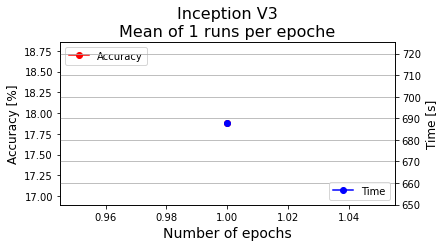

In [14]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(6, 3))
# make a plot
l1 = ax.plot(x, y_acc, color="red", marker="o", label="Accuracy")
# set x-axis label
ax.set_xlabel("Number of epochs", fontsize = 14)
# set y-axis label
ax.set_ylabel("Accuracy [%]", color="black", fontsize=12)
plt.legend(loc='upper left')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l2 = ax2.plot(x, y_time, color="blue", marker="o", label="Time")
ax2.set_ylabel("Time [s]", color="black", fontsize=12)
plt.title(f"Inception V3\nMean of {run} runs per epoche", fontsize=16)
plt.grid()
plt.legend(loc='lower right')
plt.show()

# save the plot as a file
fig.savefig(f'inception_v3_runs_{run}.jpg', format='jpeg', dpi=100, bbox_inches='tight')

1/1 [==============================] - 2s 2s/step
[[0.20125107 0.2945384  0.20165713 0.3025534 ]]
Rhino


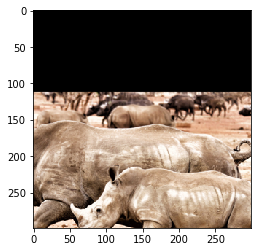

In [15]:
if tl_2 == 1:
    n = 45
    what = model.predict(images[n:n+1])
    print(what)
    what1 = list(what[0]).index(max(list(what[0])))
    # b, e, z , r
    if what1 == 0:
        print("Buffalo")
    elif what1 == 1:
        print("Elephane")
    elif what1 == 2:
        print("Zebra")
    elif what1 == 3:
        print("Rhino")


    plt.imshow(images[n], interpolation='nearest')
    plt.show()


# Dense Net 121

## Base Model

In [ ]:
if tl_3 == 1:
    base_model = tf.keras.applications.densenet.DenseNet121(include_top=True) 

In [ ]:
if tl_3 == 1:
    
    n = 155

    img_preproc = tf.keras.applications.densenet.preprocess_input(x_train[n])
    pred = base_model.predict(img_preproc[np.newaxis])

    plt.imshow(x_valid[n], interpolation='nearest')
    plt.show()

    pre = tf.keras.applications.densenet.decode_predictions(pred, top=5)
    for p in pre[0]:
        print(p)

## Transfer Learning

In [ ]:
if tl_4 == 1:
    base_model = tf.keras.applications.densenet.DenseNet121(include_top=False)

In [ ]:
if tl_4 == 1:
    x = tf.keras.layers.Input(shape=(width,height,3), dtype=tf.float32)

    base_model.trainable = False
    base_out = base_model(x)

    base_out_f = tf.keras.layers.GlobalAveragePooling2D()(base_out)

    h1 = tf.keras.layers.Dense(64, activation='sigmoid')(base_out_f)
    h2 = tf.keras.layers.Dense(4, activation='softmax')(h1)

    model = tf.keras.Model(x, h2)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0005,) ,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()

In [ ]:
if tl_4 == 1:
    batch_size = 32
    n_epochs = 55

    hist = model.fit(x_train, y_train,
                    epochs=n_epochs, batch_size=batch_size, 
                    validation_data=(x_valid, y_valid))
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(hist.epoch, hist.history['loss'])
    axs[0].plot(hist.epoch, hist.history['val_loss'])
    axs[0].legend(('training loss', 'validation loss'), loc='lower left')
    axs[1].plot(hist.epoch, hist.history['accuracy'])
    axs[1].plot(hist.epoch, hist.history['val_accuracy'])

    axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    plt.show()

In [ ]:
if tl_4 == 1:
    n = 12

    what = model.predict(images[n:n+1])

    print(what)
    what1 = list(what[0]).index(max(list(what[0])))
    # b, e, z , r
    if what1 == 0:
        print("Buffalo")
    elif what1 == 1:
        print("Elephane")
    elif what1 == 2:
        print("Zebra")
    elif what1 == 3:
        print("Rhino")


    plt.imshow(images[n], interpolation='nearest')
    plt.show()